In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/MAMI


archive.zip  KerasCaptioning.ipynb  train	  trial.zip
Glove.zip    test.zip		    training.zip


In [5]:
!unzip /content/drive/MyDrive/MAMI/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [9]:
!unzip /content/drive/MyDrive/MAMI/Glove.zip

Archive:  /content/drive/MyDrive/MAMI/Glove.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [11]:
!ls /content/drive/MyDrive/MAMI

archive.zip  KerasCaptioning.ipynb  train	  trial.zip
Glove.zip    test.zip		    training.zip


In [14]:
!ls /content/Images

1000268201_693b08cb0e.jpg  2701487024_e866eb4550.jpg  3391209042_d2de8a8978.jpg
1001773457_577c3a7d70.jpg  2701603045_6cbdc4ce7c.jpg  3391924827_53b31542ce.jpg
1002674143_1b742ab4b8.jpg  2701895972_8605c4e038.jpg  3392019836_c7aeebca1c.jpg
1003163366_44323f5815.jpg  2702506716_17a7fb3ba4.jpg  3392293702_ccb0599857.jpg
1007129816_e794419615.jpg  270263570_3160f360d3.jpg   3392851587_a638ff25e2.jpg
1007320043_627395c3d8.jpg  2703155733_19ac6f97a8.jpg  3393035454_2d2370ffd4.jpg
1009434119_febe49276a.jpg  2704257993_d485058a5f.jpg  3393152604_27bd1037f2.jpg
1012212859_01547e3f17.jpg  2704362232_7d84503433.jpg  3393343330_b13df4d8ec.jpg
1015118661_980735411b.jpg  2704379125_9c35650d16.jpg  3393394134_0caac47e1c.jpg
1015584366_dfcec3c85a.jpg  2704934519_457dc38986.jpg  3393446245_37dd3f3b59.jpg
101654506_8eb26cfb60.jpg   2705793985_007cc703fb.jpg  339350939_6643bfb270.jpg
101669240_b2d3e7f17b.jpg   2705947033_5999147842.jpg  3393926562_66cc01b001.jpg
1016887272_03199f49c4.jpg  2706023395_ac9

In [6]:
# imports to make files for trial, test texts
import random
import pandas as pd
from pandas import read_csv

In [7]:
#make lists for training and testing
df = pd.DataFrame(data=read_csv('/content/captions.txt'))
print(df)

image_list = list(set(df["image"].tolist()))
print(image_list)
print(len(image_list))

random.shuffle(image_list)
print(len(image_list))

train_images = image_list[:6000]
test_images = image_list[6000:]

print(len(train_images))
print(len(test_images))

                           image  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                 caption  
0      A child in a pink dress is climbing up a set o...  
1                  A girl going into a wooden building .  
2       A little girl climbing into a wooden playhouse .  
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451           A man is rock climbing high in the air .  
40452  A person in a red shirt climb

In [22]:
# make text files from the lists
# %mkdir Text
# %cd Text

textfile = open("flickr8k_train_images.txt", "w")
for element in train_images:
   textfile.write(element + "\n")
textfile.close()

textfile = open("flickr8k_test_images.txt", "w")
for element in test_images:
  textfile.write(element + "\n")
textfile.close()

In [8]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

import string
import os
import glob
from PIL import Image
from time import time

from keras import Input, layers
from keras import optimizers
from keras.optimizer_v2 import adam
from keras.preprocessing import sequence
from keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dense, Activation, Flatten, Reshape, Dropout
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.utils.np_utils import to_categorical

In [24]:
token_path = "/content/captions.txt"
train_images_path = "/content/flickr8k_train_images.txt"
test_images_path = "/content/flickr8k_test_images.txt"
images_path = "/content/Images/"
glove_path = '/content/glove.6B.100d.txt/'

doc = open(token_path,'r').read()
print(doc[:410])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cab


In [25]:
descriptions = dict()
for line in doc.split('\n'):
        tokens = line.split()
        if len(line) > 2:
          image_id = tokens[0].split('.')[0]
          image_desc = ' '.join(tokens[1:])
          if image_id not in descriptions:
              descriptions[image_id] = list()
          descriptions[image_id].append(image_desc)

In [26]:
table = str.maketrans('', '', string.punctuation)
for key, desc_list in descriptions.items():
    for i in range(len(desc_list)):
        desc = desc_list[i]
        desc = desc.split()
        desc = [word.lower() for word in desc]
        desc = [w.translate(table) for w in desc]
        desc_list[i] =  ' '.join(desc)

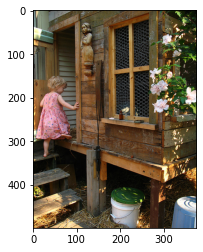

['child in a pink dress is climbing up a set of stairs in an entry way ',
 'girl going into a wooden building ',
 'little girl climbing into a wooden playhouse ',
 'little girl climbing the stairs to her playhouse ',
 'little girl in a pink dress going into a wooden cabin ']

In [27]:
pic = '1000268201_693b08cb0e.jpg'
x=plt.imread(images_path+pic)
plt.imshow(x)
plt.show()
descriptions['1000268201_693b08cb0e']

In [28]:
vocabulary = set()
for key in descriptions.keys():
        [vocabulary.update(d.split()) for d in descriptions[key]]
print('Original Vocabulary Size: %d' % len(vocabulary))

Original Vocabulary Size: 8745


In [29]:
lines = list()
for key, desc_list in descriptions.items():
    for desc in desc_list:
        lines.append(key + ' ' + desc)
new_descriptions = '\n'.join(lines)

In [30]:
doc = open(train_images_path,'r').read()
dataset = list()
for line in doc.split('\n'):
    if len(line) > 1:
      identifier = line.split('.')[0]
      dataset.append(identifier)

train = set(dataset)

In [31]:
img = glob.glob(images_path + '*.jpg')
train_images = set(open(train_images_path, 'r').read().strip().split('\n'))
train_img = []
for i in img: 
    if i[len(images_path):] in train_images:
        train_img.append(i)

test_images = set(open(test_images_path, 'r').read().strip().split('\n'))
test_img = []
for i in img: 
    if i[len(images_path):] in test_images: 
        test_img.append(i)

In [32]:
print(test_img)

['/content/Images/2942133798_e57c862a90.jpg', '/content/Images/2762301555_48a0d0aa24.jpg', '/content/Images/2061354254_faa5bd294b.jpg', '/content/Images/3421789737_f625dd17ed.jpg', '/content/Images/1359101233_16c2c150e3.jpg', '/content/Images/2704257993_d485058a5f.jpg', '/content/Images/427936315_0b8f7b8d23.jpg', '/content/Images/2264316030_600e55748d.jpg', '/content/Images/3384528359_e920154177.jpg', '/content/Images/3395173129_f0ac0a1ed4.jpg', '/content/Images/3246804978_ea2c9e56f2.jpg', '/content/Images/421808539_57abee6d55.jpg', '/content/Images/521658170_a837af87e9.jpg', '/content/Images/3208999896_dab42dc40b.jpg', '/content/Images/708860480_1a956ae0f7.jpg', '/content/Images/2200901777_f6c168bd32.jpg', '/content/Images/2661138991_d55aa0e5dc.jpg', '/content/Images/3335773346_ac0d97efeb.jpg', '/content/Images/537359971_6e28f5e66e.jpg', '/content/Images/3373870185_f79163fa51.jpg', '/content/Images/2090339522_d30d2436f9.jpg', '/content/Images/3497234632_6ec740fc1e.jpg', '/content/Imag

In [33]:
train_descriptions = dict()
for line in new_descriptions.split('\n'):
    tokens = line.split()
    image_id, image_desc = tokens[0], tokens[1:]
    if image_id in train:
        if image_id not in train_descriptions:
            train_descriptions[image_id] = list()
        desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
        train_descriptions[image_id].append(desc)

In [34]:
all_train_captions = []
for key, val in train_descriptions.items():
    for cap in val:
        all_train_captions.append(cap)

In [35]:
print(all_train_captions)

['startseq child in a pink dress is climbing up a set of stairs in an entry way endseq', 'startseq girl going into a wooden building endseq', 'startseq little girl climbing into a wooden playhouse endseq', 'startseq little girl climbing the stairs to her playhouse endseq', 'startseq little girl in a pink dress going into a wooden cabin endseq', 'startseq black dog and a spotted dog are fighting endseq', 'startseq black dog and a tricolored dog playing with each other on the road endseq', 'startseq black dog and a white dog with brown spots are staring at each other in the street endseq', 'startseq dogs of different breeds looking at each other on the road endseq', 'startseq dogs on pavement moving toward each other endseq', 'startseq little girl covered in paint sits in front of a painted rainbow with her hands in a bowl endseq', 'startseq little girl is sitting in front of a large painted rainbow endseq', 'startseq small girl in the grass plays with fingerpaints in front of a white ca

In [36]:
word_count_threshold = 10
word_counts = {}
nsents = 0
for sent in all_train_captions:
    nsents += 1
    for w in sent.split(' '):
        word_counts[w] = word_counts.get(w, 0) + 1
print(word_counts['startseq'])
vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]

print('Vocabulary = %d' % (len(vocab)))

30000
Vocabulary = 1652


In [37]:
print('startseq' in vocab)

True


In [38]:
ixtoword = {}
wordtoix = {}
ix = 1
for w in vocab:
    wordtoix[w] = ix
    ixtoword[ix] = w
    ix += 1

vocab_size = len(ixtoword) + 1

In [39]:
all_desc = list()
for key in train_descriptions.keys():
    [all_desc.append(d) for d in train_descriptions[key]]
lines = all_desc
max_length = max(len(d.split()) for d in lines)

print('Description Length: %d' % max_length)

Description Length: 37


In [41]:
glove_path = '/content'
embeddings_index = {} 
f = open(os.path.join(glove_path, 'glove.6B.200d.txt'), encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

In [42]:
embedding_dim = 200
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in wordtoix.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [43]:
model = InceptionV3(weights='imagenet')

96124928/96112376 [==============================] - 3s 0us/step


In [44]:
model_new = Model(model.input, model.layers[-2].output)

In [45]:
def preprocess(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [46]:
def encode(image):
    image = preprocess(image) 
    fea_vec = model_new.predict(image) 
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1])
    return fea_vec

encoding_train = {}
for img in train_img:
    encoding_train[img[len(images_path):]] = encode(img)
train_features = encoding_train

encoding_test = {}
for img in test_img:
    encoding_test[img[len(images_path):]] = encode(img)

In [47]:
print(encoding_test)

{'2942133798_e57c862a90.jpg': array([0.14082235, 0.5967127 , 0.74452007, ..., 0.32563525, 0.284394  ,
       0.        ], dtype=float32), '2762301555_48a0d0aa24.jpg': array([1.0457923 , 0.52476335, 1.2512    , ..., 0.8808855 , 0.7236968 ,
       0.3613978 ], dtype=float32), '2061354254_faa5bd294b.jpg': array([0.13614796, 0.13205953, 0.38553578, ..., 0.31083098, 0.02891218,
       0.3755495 ], dtype=float32), '3421789737_f625dd17ed.jpg': array([0.59635043, 0.6334673 , 0.26286384, ..., 0.4715989 , 0.51665336,
       0.57339144], dtype=float32), '1359101233_16c2c150e3.jpg': array([0.14920275, 0.11185867, 0.09455079, ..., 0.4027938 , 0.08888845,
       0.14666672], dtype=float32), '2704257993_d485058a5f.jpg': array([0.29562116, 0.24403283, 0.30571085, ..., 0.02829033, 0.55419916,
       0.37067837], dtype=float32), '427936315_0b8f7b8d23.jpg': array([0.30599266, 0.30981582, 0.11807823, ..., 0.57515764, 0.16504246,
       0.11515115], dtype=float32), '2264316030_600e55748d.jpg': array([0.205

In [48]:
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2048)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 37, 200)      330600      ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 2048)         0           ['input_2[0][0]']                
                                                                                            

In [49]:
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [51]:
def data_generator(descriptions, photos, wordtoix, max_length, num_photos_per_batch):
    X1, X2, y = list(), list(), list()
    n=0
    # loop for ever over images
    while 1:
        for key, desc_list in descriptions.items():
            n+=1
            # retrieve the photo feature
            photo = photos[key+'.jpg']
            for desc in desc_list:
                # encode the sequence
                seq = [wordtoix[word] for word in desc.split(' ') if word in wordtoix]
                # split one sequence into multiple X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pair
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    # store
                    X1.append(photo)
                    X2.append(in_seq)
                    y.append(out_seq)

            if n==num_photos_per_batch:
                yield ([array(X1), array(X2)], array(y))
                X1, X2, y = list(), list(), list()
                n=0

In [52]:
epochs = 30
batch_size = 3
steps = len(train_descriptions)//batch_size

generator = data_generator(train_descriptions, train_features, wordtoix, max_length, batch_size)
model.fit(generator, epochs=epochs, steps_per_epoch=steps, verbose=1)

Epoch 1/30
2000/2000 [==============================] - 224s 109ms/step - loss: 3.9182
Epoch 2/30
2000/2000 [==============================] - 223s 112ms/step - loss: 3.2395
Epoch 3/30
2000/2000 [==============================] - 216s 108ms/step - loss: 3.0302
Epoch 4/30
2000/2000 [==============================] - 220s 110ms/step - loss: 2.9047
Epoch 5/30
2000/2000 [==============================] - 217s 108ms/step - loss: 2.8150
Epoch 6/30
2000/2000 [==============================] - 214s 107ms/step - loss: 2.7454
Epoch 7/30
2000/2000 [==============================] - 213s 107ms/step - loss: 2.6892
Epoch 8/30
2000/2000 [==============================] - 218s 109ms/step - loss: 2.6461
Epoch 9/30
2000/2000 [==============================] - 215s 107ms/step - loss: 2.6075
Epoch 10/30
2000/2000 [==============================] - 214s 107ms/step - loss: 2.5730
Epoch 11/30
2000/2000 [==============================] - 214s 107ms/step - loss: 2.5471
Epoch 12/30
2000/2000 [==================

In [53]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break

    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [54]:
def beam_search_predictions(image, beam_index = 3):
    start = [wordtoix["startseq"]]
    start_word = [[start, 0.0]]
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            par_caps = sequence.pad_sequences([s[0]], maxlen=max_length, padding='post')
            preds = model.predict([image,par_caps], verbose=0)
            word_preds = np.argsort(preds[0])[-beam_index:]
            # Getting the top <beam_index>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        start_word = start_word[-beam_index:]
    
    start_word = start_word[-1][0]
    intermediate_caption = [ixtoword[i] for i in start_word]
    final_caption = []
    
    for i in intermediate_caption:
        if i != 'endseq':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption

#Test a couple from the test set

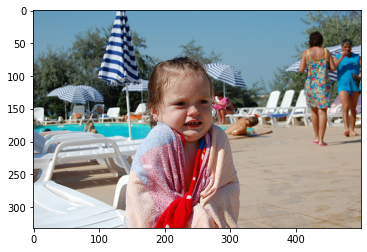

Greedy: woman in a white dress passes a white bag
Beam Search, K = 3: young girl in a pink dress pushes a bucket of water while another girl looks on
Beam Search, K = 5: little girl in a pink dress runs through the ocean
Beam Search, K = 7: little girl in a pink dress runs through the ocean


In [56]:
pic = list(encoding_test.keys())[1]
test_image = encoding_test[pic].reshape((1,2048))
x=plt.imread(images_path+pic)
plt.imshow(x)
plt.show()

print("Greedy:",greedySearch(test_image))
print("Beam Search, K = 3:",beam_search_predictions(test_image, beam_index = 3))
print("Beam Search, K = 5:",beam_search_predictions(test_image, beam_index = 5))
print("Beam Search, K = 7:",beam_search_predictions(test_image, beam_index = 7))

#Prepare the MAMI cleaned images for captioning

In [ ]:
cleaned_pngs_path = "/content/TRAINING/Cleaned_Images"
cleaned_images_path = "Text/mami_clean_images.txt"

make a list of all the cleaned image file names

In [ ]:
!ls

Glove6b  glove6b.zip  Images  Text


In [ ]:
clean = []

for filename in os.listdir(cleaned_pngs_path):
    if filename.endswith("png"): 
        clean.append(filename)

print(clean)


['image_0.png', 'image_1.png', 'image_2.png', 'image_3.png', 'image_4.png', 'image_5.png', 'image_6.png', 'image_7.png', 'image_8.png', 'image_9.png', 'image_10.png', 'image_11.png', 'image_12.png', 'image_13.png', 'image_14.png', 'image_15.png', 'image_16.png', 'image_17.png', 'image_18.png', 'image_19.png', 'image_20.png', 'image_21.png', 'image_22.png', 'image_23.png', 'image_24.png', 'image_25.png', 'image_26.png', 'image_27.png', 'image_28.png', 'image_29.png', 'image_30.png', 'image_31.png', 'image_32.png', 'image_33.png', 'image_34.png', 'image_35.png', 'image_36.png', 'image_37.png', 'image_38.png', 'image_39.png', 'image_40.png', 'image_41.png', 'image_42.png', 'image_43.png', 'image_44.png', 'image_45.png', 'image_46.png', 'image_47.png', 'image_48.png', 'image_49.png', 'image_50.png', 'image_51.png', 'image_52.png', 'image_53.png', 'image_54.png', 'image_55.png', 'image_56.png', 'image_57.png', 'image_58.png', 'image_59.png', 'image_60.png', 'image_61.png', 'image_62.png', '

make a text file from the cleaned image list

In [ ]:
%cd Text
!ls

textfile = open("mami_clean_images.txt", "w")
for element in clean:
  textfile.write(element + "\n")
textfile.close()

%cd ..
!ls

/content/drive/Shareddrives/team_MAMI/flickr8k/flickr8k_dataset/Text
captions.txt  flickr8k_test_images.txt	flickr8k_train_images.txt
/content/drive/Shareddrives/team_MAMI/flickr8k/flickr8k_dataset
Glove6b  glove6b.zip  Images  Text


make a list of cleaned images

In [ ]:
cl_img = glob.glob(cleaned_pngs_path + '*.png')

clean_images = set(open(cleaned_images_path, 'r').read().strip().split('\n'))
clean_img = []
for i in cl_img:
  if i[len(cleaned_pngs_path):] in clean: 
    clean_img.append(i)

encode the cleaned images

In [ ]:
from keras.preprocessing import image
encoding_clean = {}
for img in clean_img:
    encoding_clean[img[len(cleaned_pngs_path):]] = encode(img)

try an image from our cleaned dataset

do all the cleaned images

In [ ]:
textfile = open("clean_image_captions.csv", "w")

for pic in clean_images:
  image = encoding_clean[pic].reshape((1,2048))
  textfile.write(pic + ", " + greedySearch(image) + "\n")
  textfile.write(pic + ", " + beam_search_predictions(image, beam_index = 3) + "\n")
  textfile.write(pic + ", " + beam_search_predictions(image, beam_index = 5) + "\n")
  textfile.write(pic + ", " + beam_search_predictions(image, beam_index = 7) + "\n")
  textfile.write(pic + ", " + beam_search_predictions(image, beam_index = 10) + "\n")

textfile.close()